In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

Selecting as resources just Omnipath

In [2]:
omnipath = op.interactions.OmniPath().get()

First set the folder for input and output

In [3]:
data_folder = "../../../data/"

figures_folder = "../../Figures/SHH/"

sif_output = "../../sif_files/SHH/"

Loading the data from Northcott

In [4]:
data = pd.read_csv(data_folder + "Northcott_Lin_genes.csv")

In [5]:
shh_list = data["SHH"].dropna()
shh_list = shh_list.to_list()

/tmp/ipykernel_26638/189381725.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)


,Gene,Group,Correlation
0,ZFPM2,Group3,0.957692
1,FOXG1,Group3,0.947957
2,FSTL5,Group3,0.942308
3,PAPPA2,Group3,0.941538
4,IMPG2,Group3,0.941538
...,...,...,...
195,LRRC55,WNT,0.876923
196,SYT1,WNT,0.875385
197,SYT2,WNT,0.874615
198,PLXDC1,WNT,0.872308


In [6]:
shh_list

# Creating a Network starting from All Omnipath interactions

In [8]:
shh_net = Network(shh_list, resources = omnipath)

Error: node PLCH1 is not present in the resources database
Error: node DMRTA1 is not present in the resources database
Error: node CAMK2N1 is not present in the resources database
Error: node TCERG1L is not present in the resources database
Error: node LRRC16A is not present in the resources database
Error: node KCTD17 is not present in the resources database
Error: node GREB1L is not present in the resources database
Error: node SPHKAP is not present in the resources database
Error: node SBSPON is not present in the resources database
Error: node BARHL2 is not present in the resources database
Error: node DCDC1 is not present in the resources database
Error: node TOX3 is not present in the resources database
Error: node ALDH1A3 is not present in the resources database
Error: node KIAA1549L is not present in the resources database
Error: node NKAIN1 is not present in the resources database
Error: node TMEM98 is not present in the resources database
Error: node L3MBTL4 is not present in

Adding the node that were not found manually: PDLI3 --> PDLIM3, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [9]:
shh_net.nodes

,Genesymbol,Uniprot,Type
0,MYCL,P12524,NaN
1,SATB2,Q9UPW6,NaN
2,DRD2,P14416,NaN
3,ADCYAP1,P18509,NaN
4,PDE10A,Q9Y233,NaN
5,RBP1,P09455,NaN
6,SH3GL2,Q99962,NaN
7,PTPRK,Q15262,NaN
8,EVC2,Q86UK5,NaN
9,POU3F3,P20264,NaN


In [10]:
%%time
shh_net.complete_connection(maxlen=4, algorithm='dfs', only_signed=True, connect_with_bias=False, consensus=True)

CPU times: user 44.7 s, sys: 7.24 ms, total: 44.7 s
Wall time: 44.7 s


In [11]:
shh_net.nodes

,Genesymbol,Uniprot,Type
0,MYCL,P12524,NaN
1,SATB2,Q9UPW6,NaN
2,DRD2,P14416,NaN
3,ADCYAP1,P18509,NaN
4,PDE10A,Q9Y233,NaN
...,...,...,...
64,STAT3,P40763,NaN
65,KLF4,O43474,NaN
66,MEIS2,O14770,NaN
67,CDH2,P19022,NaN


In [12]:
shh_net.edges

,source,target,Type,Effect,References
0,P14416,P09471,None,stimulation,CA1:1445393;SIGNOR:31160049; CA1:1445393;SIGNO...
1,P09471,O14640,None,stimulation,SPIKE:19561403;SPIKE:19705439;SPIKE_LC:1956140...
2,O14640,Q5S007,None,stimulation,Lit-BM-17:19625296;SPIKE:19625296;SPIKE_LC:196...
3,Q5S007,Q99962,None,inhibition,IntAct:22998870;IntAct:25501810;ProtMapper:229...
4,P14416,P62879,None,stimulation,CA1:12869650; CA1:12869650
...,...,...,...,...,...
105,P06241,Q96J02,None,inhibition,KEA:16387660;PhosphoSite:16387660;PhosphoSite:...
106,P06241,P56945,None,bimodal,Adhesome:10739664;Adhesome:11181827;Adhesome:1...
107,P18031,P56945,None,inhibition,Adhesome:10889023;Adhesome:12023880;Adhesome:1...
108,P18031,P40763,None,bimodal,Adhesome:11970898;Adhesome:15821101;DEPOD:1197...


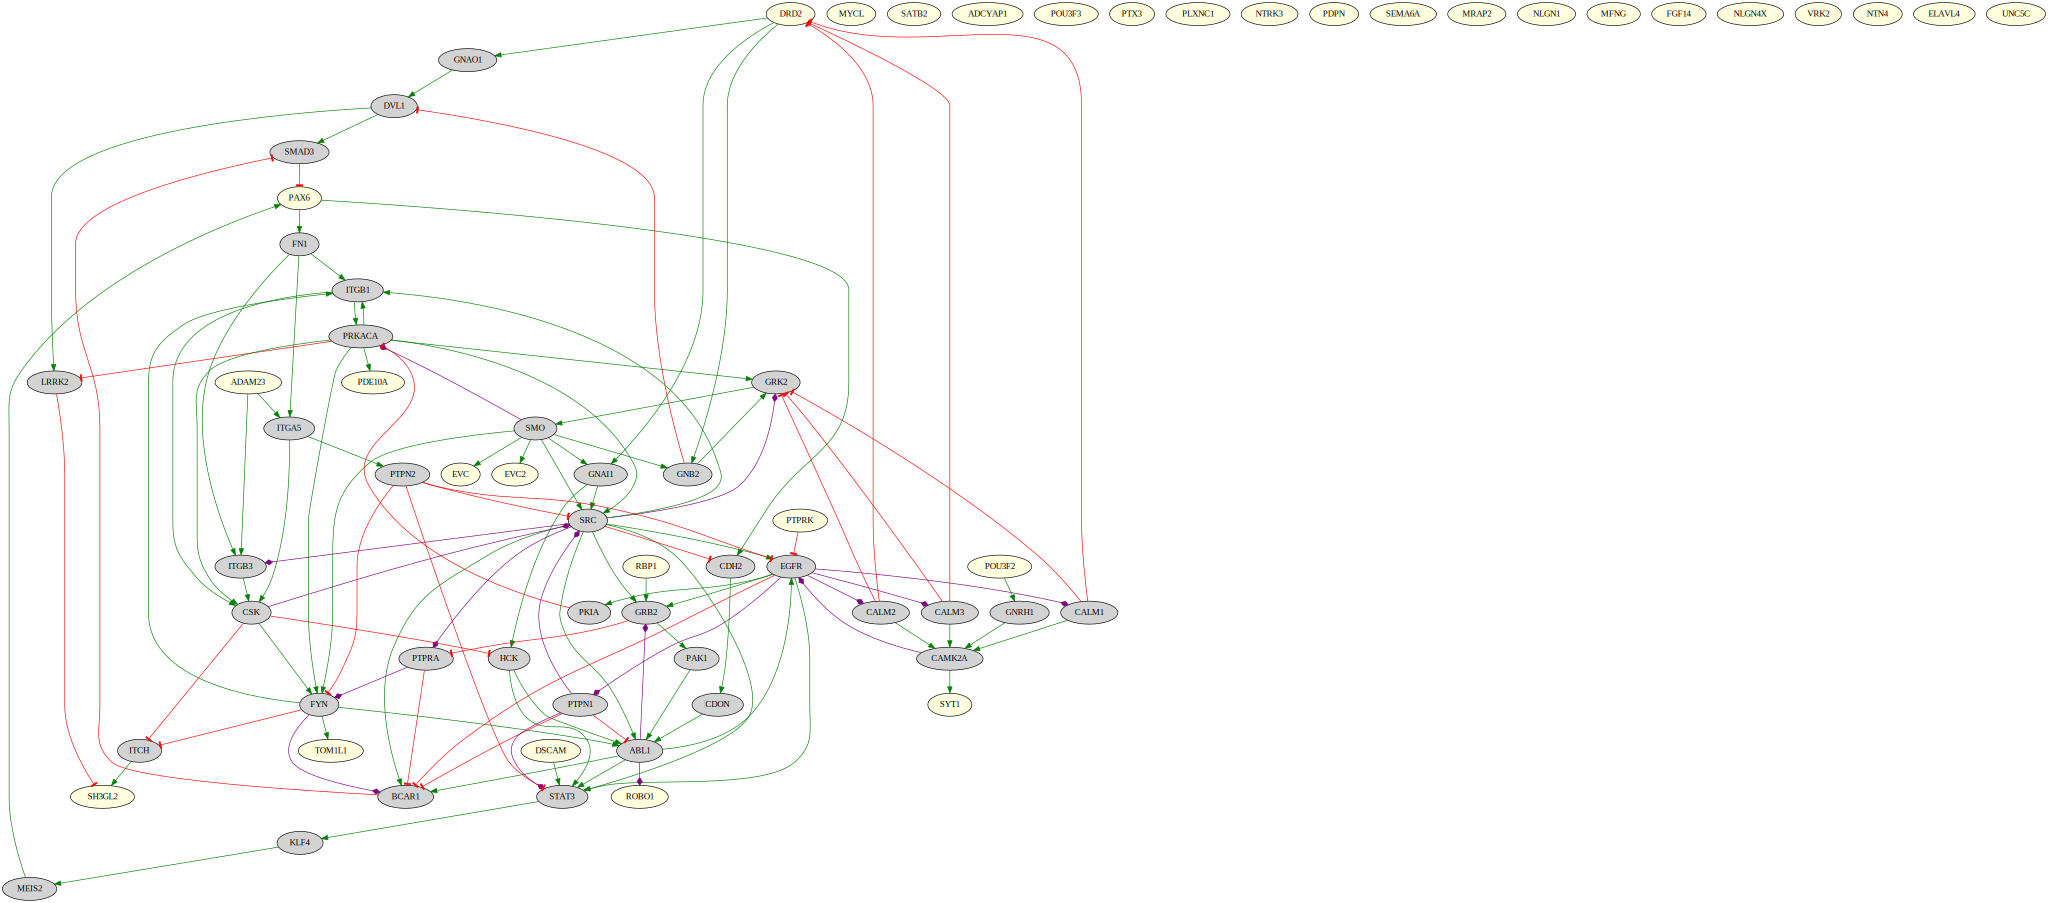

In [13]:
shh_visualizer = NetworkVisualizer(shh_net,color_by='effect', noi=True)
output = figures_folder + "SHH_omnipath_Northcott"
shh_visualizer.render(output_file=output)

# Exporting Network in sif file

In [14]:
from neko._outputs.exports import Exports

In [15]:
for node in shh_net.nodes["Uniprot"]:
    if node not in shh_net.edges["source"].values and node not in shh_net.edges["target"].values:
        node = shh_net.nodes[ shh_net.nodes["Uniprot"] == node]["Genesymbol"].values
        print( node)
        shh_net.remove_node(node[0])

['MYCL']
['SATB2']
['ADCYAP1']
['POU3F3']
['PTX3']
['PLXNC1']
['NTRK3']
['PDPN']
['SEMA6A']
['MRAP2']
['NLGN1']
['MFNG']
['FGF14']
['NLGN4X']
['VRK2']
['NTN4']
['ELAVL4']
['UNC5C']


In [19]:
export = Exports(shh_net)

In [18]:
export.export_sif(sif_output + "SHH/SHH_omnipath_Lin.sif")

FileNotFoundError: [Errno 2] No such file or directory: '../../sif_files/WNT/SHH/SHH_omnipath_Lin.sif'